Exemplo de dados:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

 Resultados comparativos:
        Modelo  Acurácia        F1  Precisão    Recall
0  Naïve Bayes  0.970387  0.875284  1.000000  0.779069
1         K-NN  0.903087  0.433567  1.000000  0.277083
2          SVM  0.977745  0.910797  0.981838  0.849987


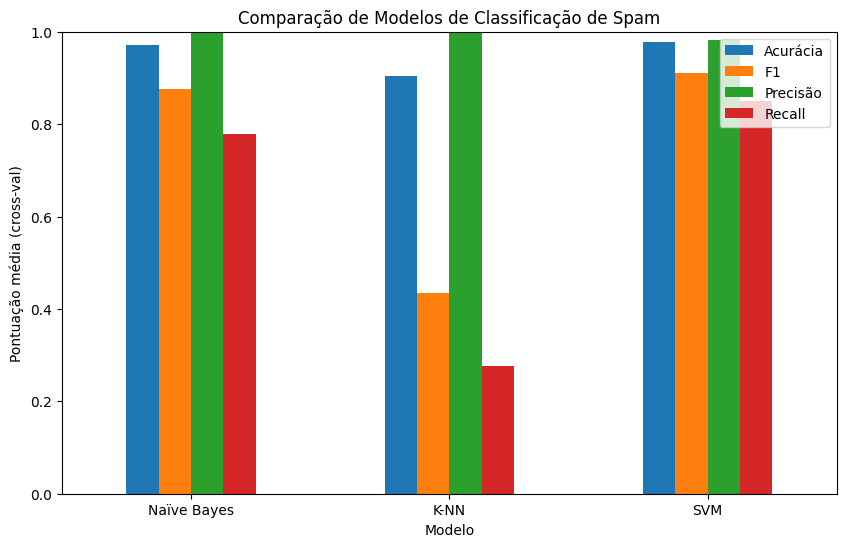

In [ ]:
# Classificação de Spam com Naïve Bayes, KNN e SVM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===============================
# 1. Dataset (SMS Spam Collection)
# ===============================
# Pode baixar em: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
# ou usar uma versão já preparada (Kaggle).
# Aqui, carregando um CSV "SMSSpamCollection.csv" com colunas ["label", "message"]

df = pd.read_csv("/content/sample_data/SMSSpamCollection", sep='\t', encoding="latin-1", header=None)
df.columns = ['label', 'message']

print("Exemplo de dados:")
print(df.head())

# Converter labels para binário
df['label'] = df['label'].map({'ham':0, 'spam':1})

# ===============================
# 2. Vetorização TF-IDF
# ===============================
X = df['message']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# ===============================
# 3. Definir Modelos
# ===============================
models = {
    "Naïve Bayes": MultinomialNB(),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear')
}

# ===============================
# 4. Avaliar com Cross-Validation
# ===============================
results = []

for name, model in models.items():
    acc = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1').mean()
    prec = cross_val_score(model, X_tfidf, y, cv=5, scoring='precision').mean()
    rec = cross_val_score(model, X_tfidf, y, cv=5, scoring='recall').mean()

    results.append([name, acc, f1, prec, rec])

# ===============================
# 5. Resultados
# ===============================
df_results = pd.DataFrame(results, columns=["Modelo", "Acurácia", "F1", "Precisão", "Recall"])
print("\n Resultados comparativos:")
print(df_results)

# ===============================
# 6. Visualização Gráfica
# ===============================
df_results.set_index("Modelo")[["Acurácia","F1","Precisão","Recall"]].plot(
    kind="bar", figsize=(10,6), rot=0
)
plt.title("Comparação de Modelos de Classificação de Spam")
plt.ylabel("Pontuação média (cross-val)")
plt.ylim(0,1)
plt.show()